In [51]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import re

In [52]:
# Creamos una lista de los campos de búsqueda
campos_busqueda = ['kw', 'au', 'mc-itype', 'ti', 'an', 'itype', 'su', 'BC', 'bc', 'callnum', 
    'I-format', 'AU', 'YE', 'an', 'se', 'In', 'bx', 'se', 'su-to', 'mc-itype,phr', 'l-format', 'Provider']

# Creamos una expresión regular para encontrar los campos
patrones = r'\b(?:' + '|'.join(campos_busqueda) + r')\b'

# Funcion para extraer el campo de cada fila
def extraer_campo(texto):
    match = re.search(patrones, texto)
    return match.group(0) if match else None

In [53]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv' que contiene los datos de la busqueda de los usuarios en el sistema Koha
data_frame = pd.read_csv("d:/Users/Laura/Desktop/Espacio Integrador II/3 - Practica Academica/Practica-Acad-mica/datos/Estadísticas consultas catálogo-reportresults.csv", sep=';')

### Estrucutura del archivo
##### Primer contacto con el archivo

In [54]:
# Vemos los primeros datos del archivo
data_frame.head()

,sessionid,query_desc,type,total,time,branchcode,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:27:49,FING,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:28:25,FING,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:29:51,FING,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:02,FING,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:13,FING,DOCENTE


In [55]:
# Consultamos los tipos de variable de cada columna
print(data_frame.dtypes)

sessionid       object
query_desc      object
type            object
total            int64
time            object
branchcode      object
categorycode    object
dtype: object


In [56]:
# Vemos las medidas estadisticas basicas para la variable 'total'
print("Estadísticas descriptivas de la columna 'total':")
data_frame['total'].describe()

Estadísticas descriptivas de la columna 'total':


count     2535.000000
mean       190.157791
std        820.385073
min          0.000000
25%          2.000000
50%          7.000000
75%         33.000000
max      11525.000000
Name: total, dtype: float64

In [57]:
# Nos fijamos la cantidad de veces que el sistema no encontró ningun material con la busqueda ingresada por el usuario
cero_resultados = data_frame[data_frame['total'] == 0]
print(f"Las búsquedas totales que no tuvieron ningun resultado son: {len(cero_resultados)}")

print(f"Esto representa un porcentaje del {round((len(cero_resultados) / len(data_frame))*100, 2)} %")

Las búsquedas totales que no tuvieron ningun resultado son: 317
Esto representa un porcentaje del 12.5 %


In [58]:
# Buscamos el valor maximo de resultados que logro devolver el sistema
max_resultados = data_frame['total'].max()
print(f"Máximo de resultados que encontró el sistema: {max_resultados}")

# Encontramos el usuario que realizo esta busqueda
data_frame[data_frame['total'] == max_resultados]

Máximo de resultados que encontró el sistema: 11525


,sessionid,query_desc,type,total,time,branchcode,categorycode
1394,7a7a070b4c157d901bc30c69555b7dfa,"kw,wrdl: c++,",biblio,11525,2022-11-01 11:30:25,FING,BIBLIOTECA


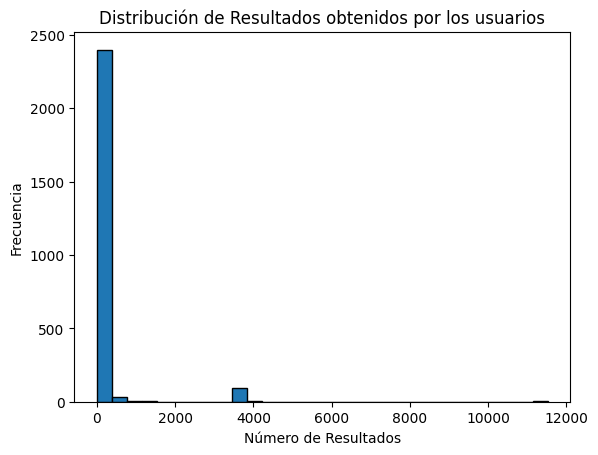

In [59]:
# Histograma de la columna 'total'
plt.hist(data_frame['total'], bins=30, edgecolor='black')
plt.title('Distribución de Resultados obtenidos por los usuarios')
plt.xlabel('Número de Resultados')
plt.ylabel('Frecuencia')
plt.show()

### Identificación de las variables más importantes y exploración de los datos
##### Se identificarán las variables que ayudarán a resolver nuestro problema. Además de hacer una exploración de los datos que nos brinde más información sobre los datos

In [60]:
# Filtramos el data frame, nos quedaremos con las variables que resolverán nuestro problema
df_filtrado = data_frame[['sessionid', 'query_desc','total','time', 'categorycode']]

# Hacemos una copia del data frame filtrado para poder trabajar en otras ramas
df_auxiliar = df_filtrado.copy()

# Mostramos las primeras filas del data frame filtrado
df_filtrado.head()

,sessionid,query_desc,total,time,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",16,2018-10-17 15:27:49,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",16,2018-10-17 15:28:25,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:29:51,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:30:02,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:30:13,DOCENTE


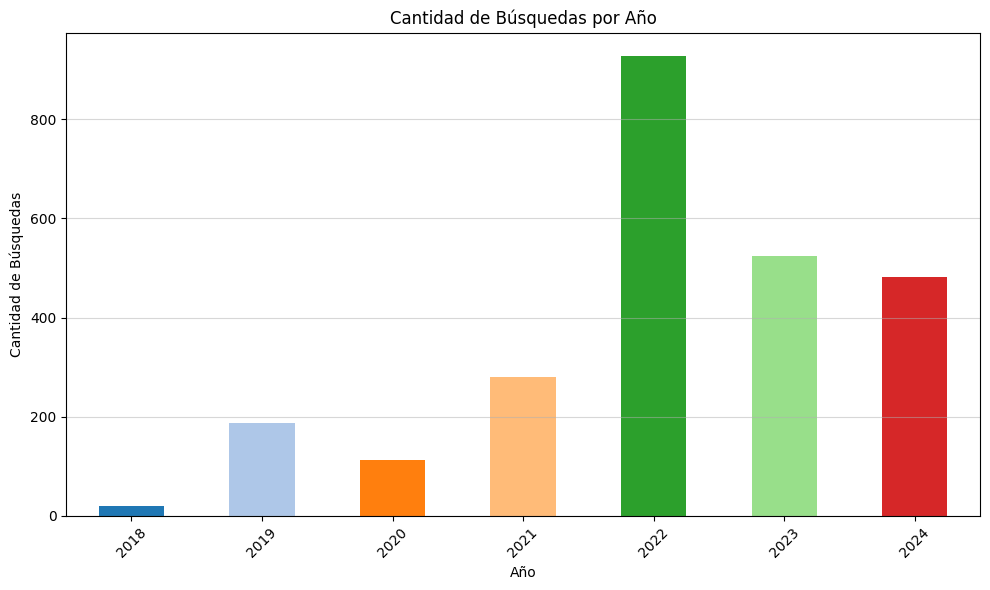

In [61]:
# Pasamos el 'time' de la busqueda a formato tiempo para extraer el año y contabilizarlos
df_auxiliar['time'] = pd.to_datetime(df_filtrado['time'])
df_auxiliar['año'] = df_auxiliar['time'].dt.year

total_busquedas = df_auxiliar['año'].value_counts().sort_index()

# Grafico para el total de busquedas por año con colores diferentes
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(range(len(total_busquedas)))
total_busquedas.plot(kind='bar', color=colors)
plt.title('Cantidad de Búsquedas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

In [62]:
# Buscamos el usuario con más búsquedas dentro del sistema
maximo_usuario_busqueda = df_auxiliar['sessionid'].value_counts().sort_index()
print("El usuario con más busquedas en el sistema es: ")
maximo_usuario_busqueda[maximo_usuario_busqueda == maximo_usuario_busqueda.max()]

El usuario con más busquedas en el sistema es: 


sessionid
e03def7e497ec6c9bb60f290d5247dc8    49
Name: count, dtype: int64

In [63]:
cantidad_usuarios = df_auxiliar['sessionid'].nunique()
print("La cantidad de usuarios que hicieron una búsqueda en el sistema son:", cantidad_usuarios)

La cantidad de usuarios que hicieron una búsqueda en el sistema son: 853


### Etapa de limpieza

In [64]:
# Borramos valores duplicados en el data frame filtrado
df_filtrado.drop_duplicates()

print("Cantidad de filas duplicadas eliminadas:", len(df_filtrado) - len(df_filtrado.drop_duplicates()))

Cantidad de filas duplicadas eliminadas: 65


In [65]:
# Nos fijamos si las columnas tienen algún valor nulo
df_filtrado.info()

# Podemos observar que de las 2535 filas ninguna posee valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sessionid     2535 non-null   object
 1   query_desc    2535 non-null   object
 2   total         2535 non-null   int64 
 3   time          2535 non-null   object
 4   categorycode  2535 non-null   object
dtypes: int64(1), object(4)
memory usage: 99.2+ KB


In [66]:
# Buscamos las búsquedas que no tienen un campo ingresado
filas_sin_query = df_filtrado[~ df_filtrado['query_desc'].str.contains(patrones, na=False)]

In [67]:
# Imputamos las filas que no tienen campos ingresados
filas_sin_query.loc[filas_sin_query.index == 750, 'query_desc'] = filas_sin_query.loc[750, 'query_desc'].replace('robot', 'kw: robot')
filas_sin_query.loc[filas_sin_query.index == 752, 'query_desc'] = filas_sin_query.loc[752, 'query_desc'].replace('robot', 'kw: robot')
filas_sin_query.loc[filas_sin_query.index == 754, 'query_desc'] = filas_sin_query.loc[754, 'query_desc'].replace('da vinci', 'kw,wrdl: da vinci')
filas_sin_query.loc[filas_sin_query.index == 756, 'query_desc'] = filas_sin_query.loc[756, 'query_desc'].replace('robotica', 'kw: robotica')

In [68]:
# Actualizamos los valores de los campos de busqueda en el data frame principal
df_filtrado.update(filas_sin_query)

### Preparación de los datos para el análisis estadístico

In [69]:
# Aplicar la función para crear una nueva columna 'campos_utilzado'
df_filtrado.loc[:, 'campo_utilizado'] = df_filtrado['query_desc'].apply(extraer_campo)

C:\Users\Laura\AppData\Local\Temp\ipykernel_832\1394677314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'campo_utilizado'] = df_filtrado['query_desc'].apply(extraer_campo)


In [70]:
# Pero como no se guardan todos los campos que utilizo el usuario, tendremos que realizar otra imputacion para estos casos
df_auxiliar['contador'] = df_auxiliar['query_desc'].str.count(':')
dos_puntos = df_auxiliar[df_auxiliar['contador'] > 1]

In [71]:
# Imputación de los campos utilizados por los usuarios para hacer la busqueda
df_filtrado.loc[5, 'campo_utilizado'] = (df_filtrado.loc[5, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[6, 'campo_utilizado'] = (df_filtrado.loc[6, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[7, 'campo_utilizado'] = (df_filtrado.loc[7, 'campo_utilizado'] + ', su-to' + ', su-to' + ', su-to')
df_filtrado.loc[8, 'campo_utilizado'] = (df_filtrado.loc[8, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[9, 'campo_utilizado'] = (df_filtrado.loc[9, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[10, 'campo_utilizado'] = (df_filtrado.loc[10, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[11, 'campo_utilizado'] = (df_filtrado.loc[11, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[29, 'campo_utilizado'] = (df_filtrado.loc[29, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[33, 'campo_utilizado'] = (df_filtrado.loc[33, 'campo_utilizado'] + ', itype')
df_filtrado.loc[35, 'campo_utilizado'] = (df_filtrado.loc[35, 'campo_utilizado'] + ', itype')
df_filtrado.loc[48, 'campo_utilizado'] = (df_filtrado.loc[48, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[49, 'campo_utilizado'] = (df_filtrado.loc[49, 'campo_utilizado'] + ', mc-itype' + ', mc-itype')
df_filtrado.loc[111, 'campo_utilizado'] = (df_filtrado.loc[111, 'campo_utilizado'] + ', au')
df_filtrado.loc[252, 'campo_utilizado'] = (df_filtrado.loc[252, 'campo_utilizado'] + ', I-format')
df_filtrado.loc[256, 'campo_utilizado'] = (df_filtrado.loc[256, 'campo_utilizado'] + ', I-format')
df_filtrado.loc[277, 'campo_utilizado'] = (df_filtrado.loc[277, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[288, 'campo_utilizado'] = (df_filtrado.loc[288, 'campo_utilizado'] + ', au')
df_filtrado.loc[358, 'campo_utilizado'] = (df_filtrado.loc[358, 'campo_utilizado'] + ', ti'+ ', not au')
df_filtrado.loc[368, 'campo_utilizado'] = (df_filtrado.loc[368, 'campo_utilizado'] + ', itype')
df_filtrado.loc[374, 'campo_utilizado'] = (df_filtrado.loc[374, 'campo_utilizado'] + ', itype')
df_filtrado.loc[395, 'campo_utilizado'] = (df_filtrado.loc[395, 'campo_utilizado'] + ', itype')
df_filtrado.loc[397, 'campo_utilizado'] = (df_filtrado.loc[397, 'campo_utilizado'] + ', itype')
df_filtrado.loc[429, 'campo_utilizado'] = (df_filtrado.loc[429, 'campo_utilizado'] + ', itype')
df_filtrado.loc[431, 'campo_utilizado'] = (df_filtrado.loc[431, 'campo_utilizado'] + ', itype')
df_filtrado.loc[432, 'campo_utilizado'] = (df_filtrado.loc[432, 'campo_utilizado'] + ', itype')
df_filtrado.loc[444, 'campo_utilizado'] = (df_filtrado.loc[444, 'campo_utilizado'] + ', itype')
df_filtrado.loc[453, 'campo_utilizado'] = (df_filtrado.loc[453, 'campo_utilizado'] + ', su')
df_filtrado.loc[628, 'campo_utilizado'] = (df_filtrado.loc[628, 'campo_utilizado'] + ', au')
df_filtrado.loc[636, 'campo_utilizado'] = (df_filtrado.loc[636, 'campo_utilizado'] + ', itype')
df_filtrado.loc[637, 'campo_utilizado'] = (df_filtrado.loc[637, 'campo_utilizado'] + ', itype')
df_filtrado.loc[649, 'campo_utilizado'] = (df_filtrado.loc[649, 'campo_utilizado'] + ', au')
df_filtrado.loc[746, 'campo_utilizado'] = (df_filtrado.loc[746, 'campo_utilizado'] + ', itype')
df_filtrado.loc[747, 'campo_utilizado'] = (df_filtrado.loc[747, 'campo_utilizado'] + ', itype')
df_filtrado.loc[749, 'campo_utilizado'] = (df_filtrado.loc[749, 'campo_utilizado'] + ', itype')
df_filtrado.loc[768, 'campo_utilizado'] = (df_filtrado.loc[768, 'campo_utilizado'] + ', itype')
df_filtrado.loc[773, 'campo_utilizado'] = (df_filtrado.loc[773, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[774, 'campo_utilizado'] = (df_filtrado.loc[774, 'campo_utilizado'] + ', se')
df_filtrado.loc[775, 'campo_utilizado'] = (df_filtrado.loc[775, 'campo_utilizado'] + ', itype')
df_filtrado.loc[776, 'campo_utilizado'] = (df_filtrado.loc[776, 'campo_utilizado'] + ', itype')
df_filtrado.loc[779, 'campo_utilizado'] = (df_filtrado.loc[779, 'campo_utilizado'] + ', au')
df_filtrado.loc[780, 'campo_utilizado'] = (df_filtrado.loc[780, 'campo_utilizado'] + ', au')
df_filtrado.loc[862, 'campo_utilizado'] = (df_filtrado.loc[862, 'campo_utilizado'] + ', itype')
df_filtrado.loc[868, 'campo_utilizado'] = (df_filtrado.loc[868, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[869, 'campo_utilizado'] = (df_filtrado.loc[869, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[884, 'campo_utilizado'] = (df_filtrado.loc[884, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[964, 'campo_utilizado'] = (df_filtrado.loc[964, 'campo_utilizado'] + ', au')
df_filtrado.loc[974, 'campo_utilizado'] = (df_filtrado.loc[974, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[975, 'campo_utilizado'] = (df_filtrado.loc[975, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1117, 'campo_utilizado'] = (df_filtrado.loc[1117, 'campo_utilizado'] + ', au')
df_filtrado.loc[1119, 'campo_utilizado'] = (df_filtrado.loc[1119, 'campo_utilizado'] + ', au')
df_filtrado.loc[1131, 'campo_utilizado'] = (df_filtrado.loc[1131, 'campo_utilizado'] + ', au')
df_filtrado.loc[1187, 'campo_utilizado'] = (df_filtrado.loc[1187, 'campo_utilizado'] + ', au')
df_filtrado.loc[1188, 'campo_utilizado'] = (df_filtrado.loc[1188, 'campo_utilizado'] + ', au')
df_filtrado.loc[1189, 'campo_utilizado'] = (df_filtrado.loc[1189, 'campo_utilizado'] + ', au' + ', mc-itype' + ', mc-itype')
df_filtrado.loc[1196, 'campo_utilizado'] = (df_filtrado.loc[1196, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1223, 'campo_utilizado'] = (df_filtrado.loc[1223, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1273, 'campo_utilizado'] = (df_filtrado.loc[1273, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1275, 'campo_utilizado'] = (df_filtrado.loc[1275, 'campo_utilizado'] + ', au')
df_filtrado.loc[1302, 'campo_utilizado'] = (df_filtrado.loc[1302, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1303, 'campo_utilizado'] = (df_filtrado.loc[1303, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1304, 'campo_utilizado'] = (df_filtrado.loc[1304, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1305, 'campo_utilizado'] = (df_filtrado.loc[1305, 'campo_utilizado'] + ', ti')
df_filtrado.loc[1306, 'campo_utilizado'] = (df_filtrado.loc[1306, 'campo_utilizado'] + ', ti' + ', mc-itype' + ', mc-itype')
df_filtrado.loc[1307, 'campo_utilizado'] = (df_filtrado.loc[1307, 'campo_utilizado'] + ', ti' + ', In')
df_filtrado.loc[1384, 'campo_utilizado'] = (df_filtrado.loc[1384, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1435, 'campo_utilizado'] = (df_filtrado.loc[1435, 'campo_utilizado'] + ', bx')
df_filtrado.loc[1470, 'campo_utilizado'] = (df_filtrado.loc[1470, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1471, 'campo_utilizado'] = (df_filtrado.loc[1471, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1472, 'campo_utilizado'] = (df_filtrado.loc[1472, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1473, 'campo_utilizado'] = (df_filtrado.loc[1473, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1474, 'campo_utilizado'] = (df_filtrado.loc[1474, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1475, 'campo_utilizado'] = (df_filtrado.loc[1475, 'campo_utilizado'] + ', itype' + ', su-to' + ', au')
df_filtrado.loc[1494, 'campo_utilizado'] = (df_filtrado.loc[1494, 'campo_utilizado'] + ', au')
df_filtrado.loc[1593, 'campo_utilizado'] = (df_filtrado.loc[1593, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1594, 'campo_utilizado'] = (df_filtrado.loc[1594, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1596, 'campo_utilizado'] = (df_filtrado.loc[1596, 'campo_utilizado'] + ', kw')
df_filtrado.loc[1597, 'campo_utilizado'] = (df_filtrado.loc[1597, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1658, 'campo_utilizado'] = (df_filtrado.loc[1658, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1731, 'campo_utilizado'] = (df_filtrado.loc[1731, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1769, 'campo_utilizado'] = (df_filtrado.loc[1769, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1782, 'campo_utilizado'] = (df_filtrado.loc[1782, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1841, 'campo_utilizado'] = (df_filtrado.loc[1841, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1842, 'campo_utilizado'] = (df_filtrado.loc[1842, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1845, 'campo_utilizado'] = (df_filtrado.loc[1845, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1880, 'campo_utilizado'] = (df_filtrado.loc[1880, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1961, 'campo_utilizado'] = (df_filtrado.loc[1961, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1962, 'campo_utilizado'] = (df_filtrado.loc[1962, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1968, 'campo_utilizado'] = (df_filtrado.loc[1968, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1969, 'campo_utilizado'] = (df_filtrado.loc[1969, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1978, 'campo_utilizado'] = (df_filtrado.loc[1978, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2045, 'campo_utilizado'] = (df_filtrado.loc[2045, 'campo_utilizado'] + ', au')
df_filtrado.loc[2202, 'campo_utilizado'] = (df_filtrado.loc[2202, 'campo_utilizado'] + ', I-format')
df_filtrado.loc[2206, 'campo_utilizado'] = (df_filtrado.loc[2206, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2217, 'campo_utilizado'] = (df_filtrado.loc[2217, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2219, 'campo_utilizado'] = (df_filtrado.loc[2219, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2239, 'campo_utilizado'] = (df_filtrado.loc[2239, 'campo_utilizado'] + ', au')
df_filtrado.loc[2323, 'campo_utilizado'] = (df_filtrado.loc[2323, 'campo_utilizado'] + ', au')
df_filtrado.loc[2365, 'campo_utilizado'] = (df_filtrado.loc[2365, 'campo_utilizado'] + ', mc-itype' + ', mc-itype')
df_filtrado.loc[2379, 'campo_utilizado'] = (df_filtrado.loc[2379, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2427, 'campo_utilizado'] = (df_filtrado.loc[2427, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2474, 'campo_utilizado'] = (df_filtrado.loc[2474, 'campo_utilizado'] + ', au')
df_filtrado.loc[2490, 'campo_utilizado'] = (df_filtrado.loc[2490, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2491, 'campo_utilizado'] = (df_filtrado.loc[2491, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2533, 'campo_utilizado'] = (df_filtrado.loc[2533, 'campo_utilizado'] + ', au')

In [74]:
# Agregamos una nueva columna que contabilice la cantidad de campos utilizados por el usuario
df_filtrado['cant_campos_utilizados'] = df_filtrado['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)

In [73]:
# Hacer dos graficos con esta variable. Uno con los datos no generalizados y otro con los datos generalizados
# La generalización es contar los usuarios que hicieron una busqueda fuera y dentro de la biblioteca

# total_categorias_usuarios = df_auxiliar['categorycode'].value_counts().sort_index()
# print(total_categorias_usuarios)